   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_69636/4182322022.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_69636/4182322022.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


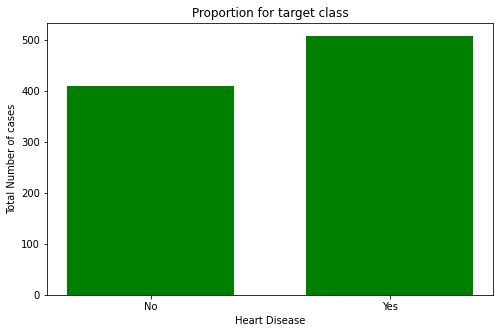

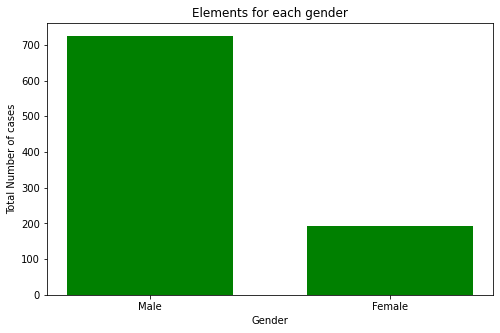

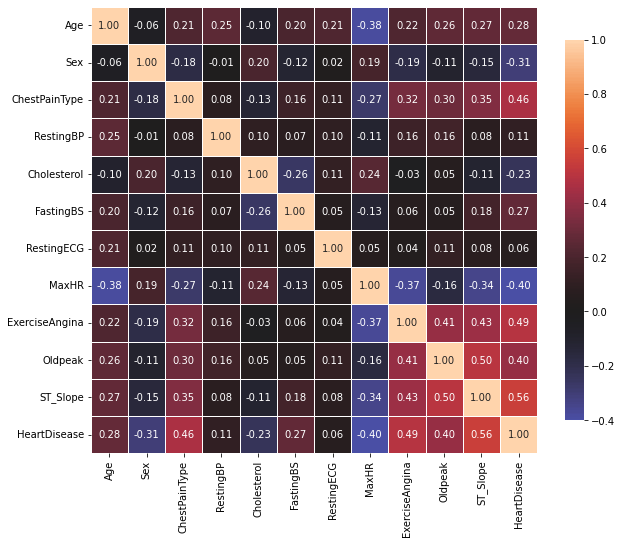

here is the eigenvalues sssssss
E-value: [2645.13578814 1322.21321192 1066.29089427  899.21518706  377.05586386
  799.74922022  758.90407334  459.50431579  643.30728082  548.1556838
  578.46848077]
E-vector [[-3.41853015e-01 -1.18214525e-01  4.47532598e-01 -1.98015679e-01
  -3.33083526e-01 -1.31977696e-01  3.02283894e-01  3.80102483e-01
   2.18878745e-01  4.65727931e-01 -2.52902829e-02]
 [ 2.04244525e-01 -3.32696166e-01  1.47906263e-01 -1.35666366e-01
   4.76134916e-02 -8.29742818e-01 -4.62183384e-02  3.67368590e-02
  -2.43143002e-01 -2.24397227e-01 -6.01436145e-02]
 [-3.58826288e-01  3.14492850e-02 -9.39696819e-02  2.73689593e-01
  -2.92338806e-02  9.91712361e-03  5.91459033e-02  3.37734041e-02
  -8.43458204e-01  2.63637142e-01  4.57105249e-04]
 [-1.70256839e-01 -3.35704936e-01  3.48051279e-01 -5.07743937e-01
  -2.51192328e-02  3.79928339e-01 -3.70942570e-01 -2.06033776e-01
  -2.25978808e-01 -1.70490157e-01 -2.72420750e-01]
 [ 1.44996610e-01 -6.16548319e-01 -1.68642370e-01 -3.57929555

12


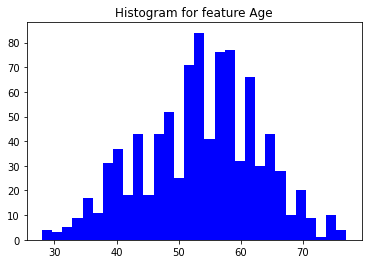

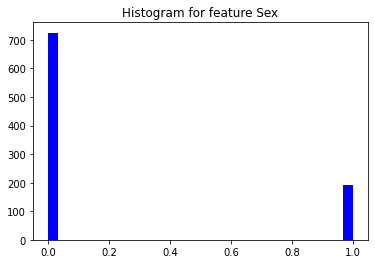

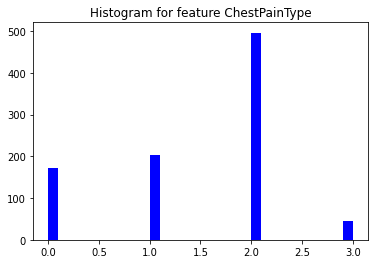

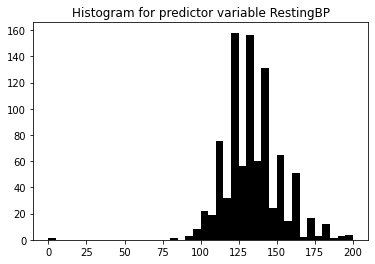

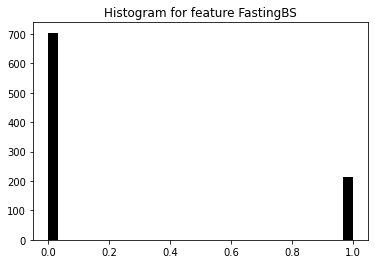

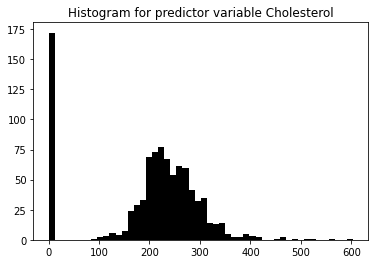

In [1]:
import pandas as pd 
import plotly.express as px 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve

DataFrame=pd.read_csv('heart.csv')
print(DataFrame.head())
print(DataFrame.info())
#2/3 train 1/3 testing and validation
#error 
#so in total there are 908 dataset 
#Note that there are 5 features variables that need to convert in to some integer for model to understand 
FeaturesConvert=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for feature in FeaturesConvert:
    Replace={}
    for num,value in enumerate(DataFrame[feature].unique()):
        Replace[value]=num
    DataFrame[feature]=DataFrame[feature].replace(Replace)

print(DataFrame.head())
print(DataFrame.describe())#Statistics propety
#DataFrame=np.array(DataFrame)#change the data in to array for simple manipulation

#print(DataFrame[0:5,:])

#generalize the bar plot to see how the target(HeartDisease) is distributed
y=DataFrame['HeartDisease'].value_counts().sort_index()
print(y[0])
HeartDisease={'No':y[0],'Yes':y[1]}
YesOrNo=list(HeartDisease.keys())
values=list(HeartDisease.values())
fig=plt.figure(figsize=(8,5))

plt.bar(YesOrNo,values,color='Green',width=0.7)
plt.xlabel('Heart Disease')
plt.ylabel('Total Number of cases')
plt.title('Proportion for target class')
fig.show()

y2=DataFrame['Sex'].value_counts().sort_index()
GenderDict={'Male':y2[0],'Female':y2[1]}
fig2=plt.figure(figsize=(8,5))
Gender=list(GenderDict.keys())
value2=list(GenderDict.values())
plt.bar(Gender,value2,color='Green',width=0.69)
plt.xlabel('Gender')
plt.ylabel('Total Number of cases')
plt.title('Elements for each gender')
fig2.show()

def CorrelationHeatmap(Data):
    correlations=DataFrame.corr()
    fig,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(correlations,vmax=1.0,center=0,fmt='.2f',square=True,linewidths=.5,annot=True,cbar_kws={'shrink': .70})
    plt.show()
from sklearn import preprocessing
# Convert from integer to float
scaler = preprocessing.StandardScaler()
# Apply the same scaling to both datasets
train_standardized = scaler.fit_transform(DataFrame.iloc[:,:-1])

CorrelationHeatmap(DataFrame)
from numpy.linalg import eig

w2,v2=eig(np.dot(np.transpose(train_standardized),train_standardized))
print('here is the eigenvalues sssssss')
print('E-value:', w2)
print('E-vector', v2)
#we can see the correlations between Oldpeak and ST_Slop are high 0.5 but the other are fine 

to_sort=DataFrame.corr("spearman")["HeartDisease"].sort_values(ascending=False)
fig = px.bar( x=to_sort.index[1:], y=to_sort.values[1:], 
             title="Spearman correlation between features and HeartDisease",labels={"y": "Correlation","x": "Feature"})
fig.add_hline(y=0)
fig.show()

#we see that Sex and MaxHR and Cholesterol have negative correlation with HeartDisease
print(np.shape(np.array(DataFrame))[1])


AgeData=DataFrame['Age']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature Age')
plt.show()

AgeData=DataFrame['Sex']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature Sex')
plt.show()

AgeData=DataFrame['ChestPainType']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='blue')
plt.title('Histogram for feature ChestPainType')
plt.show()

AgeData=DataFrame['RestingBP']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=40,color='black')
plt.title('Histogram for predictor variable RestingBP')
plt.show()

AgeData=DataFrame['FastingBS']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=30,color='black')
plt.title('Histogram for feature FastingBS')
plt.show()

AgeData=DataFrame['Cholesterol']
AgeData=np.array(AgeData)
plt.hist(AgeData,bins=50,color='black')
plt.title('Histogram for predictor variable Cholesterol')
plt.show()
#1 RestingBP has an outlier with value 0 
#2 Cholesterol has a large group (172) with value 0 

#In the first case, the outlier can easly be detected and removed using mean and standard deviation. The second case must be handled differently: 
# it'd be wrong to remove all these elements from the dataset so 
# another way to handle this problem could be replace this values with predictions made from a regression model.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



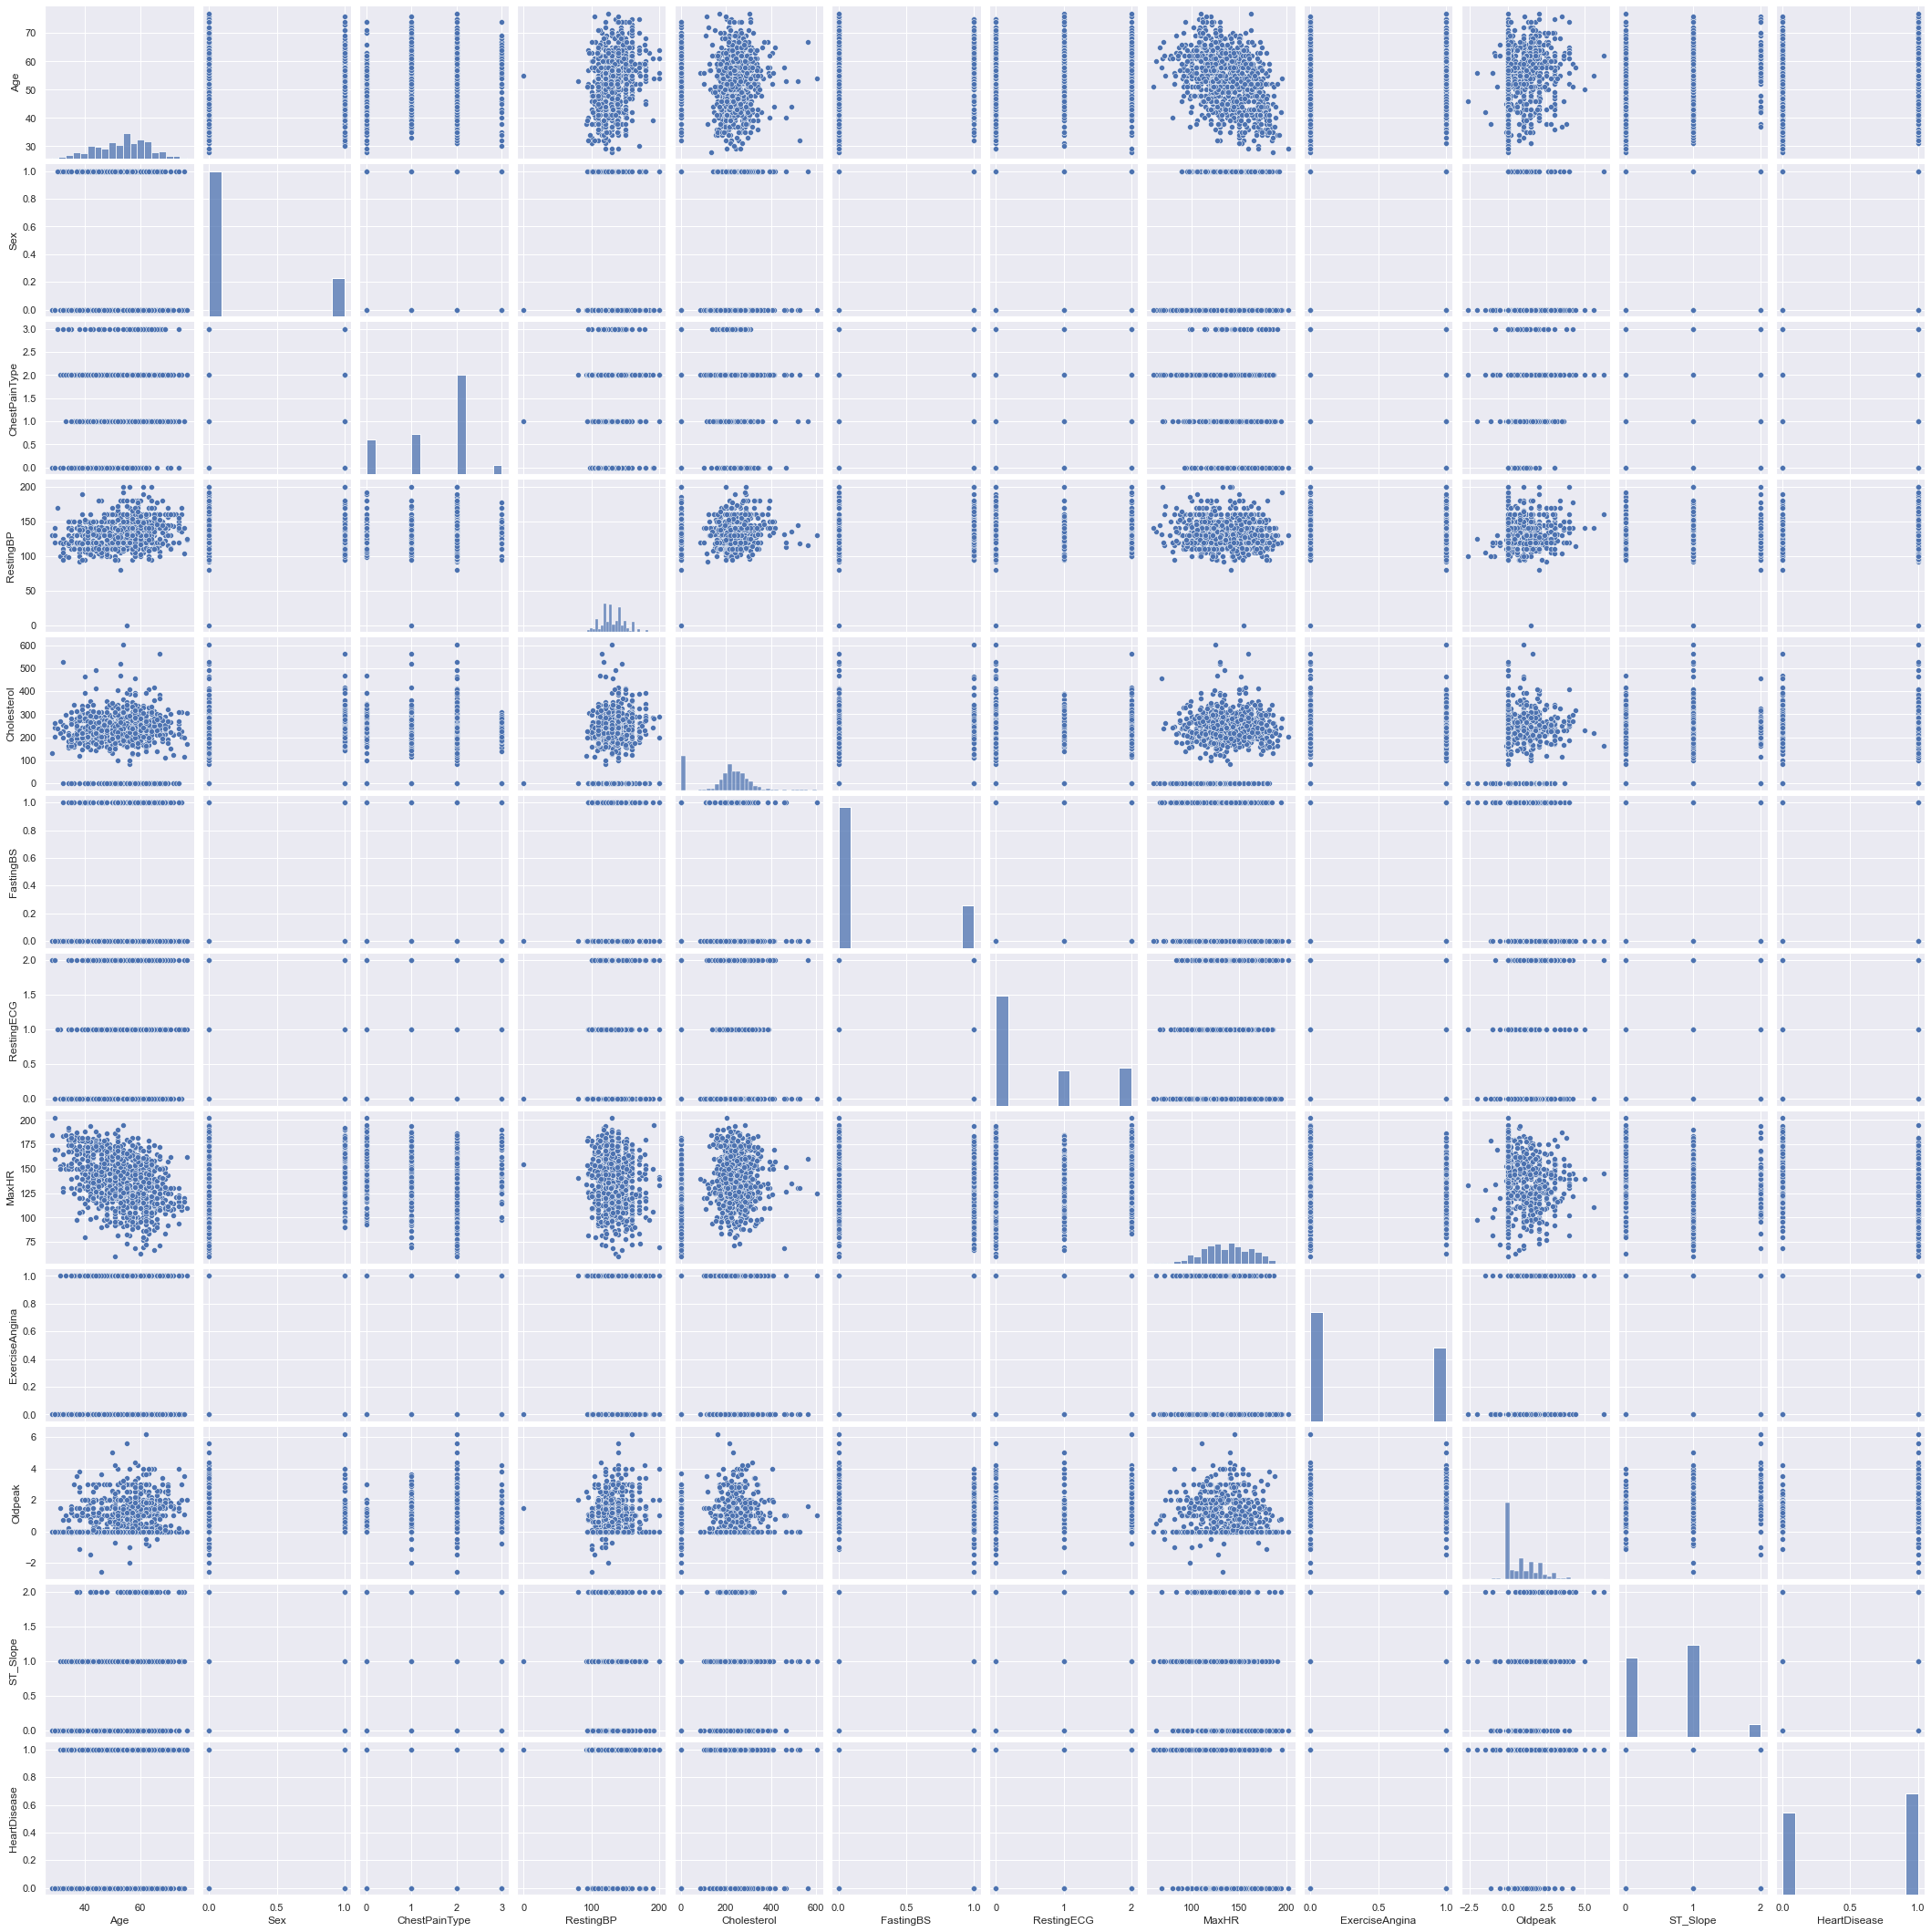

In [2]:
#scatterplot
sns.set()
sns.pairplot(DataFrame, size = 2.5)
plt.show();

In [3]:
print(w2)

print([2645.13578814/element for element in w2])


[2645.13578814 1322.21321192 1066.29089427  899.21518706  377.05586386
  799.74922022  758.90407334  459.50431579  643.30728082  548.1556838
  578.46848077]
[0.9999999999998659, 2.000536497657378, 2.4806887148278234, 2.9416048863415796, 7.015235782476653, 3.307456539218492, 3.4854679017788412, 5.75649824656942, 4.111776544404147, 4.825519220745375, 4.572653266439329]


Removed element(s) with: RestingBP 0
# of outliers removed: 1
(917, 12)
The X dataset are :    Age  Sex  ChestPainType  RestingBP  FastingBS  RestingECG  MaxHR  \
0   40    0              0        140          0           0    172   
1   49    1              1        160          0           0    156   
2   37    0              0        130          0           1     98   
3   48    1              2        138          0           0    108   
4   54    0              1        150          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0               0      0.0         0             0  
1               0      1.0         1             1  
2               0      0.0         0             0  
3               1      1.5         1             1  
4               0      0.0         0             0  
(746, 11)
(917, 12)

The cat_cols is:  []
(733, 12)
(184, 12)

1    0.552524
0    0.447476
Name: HeartDisease, dtype: float64

1    0.554348
0    0.445652
Name: He

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



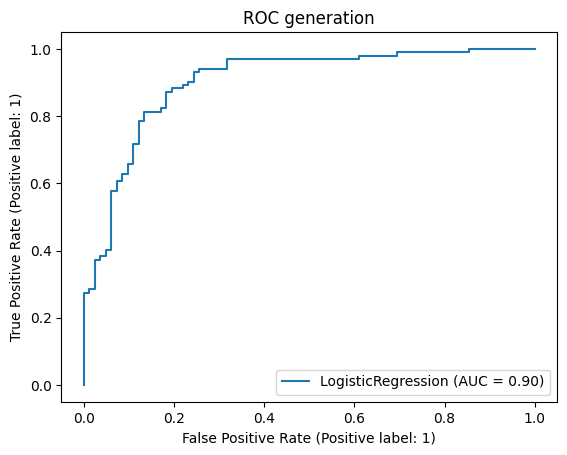

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



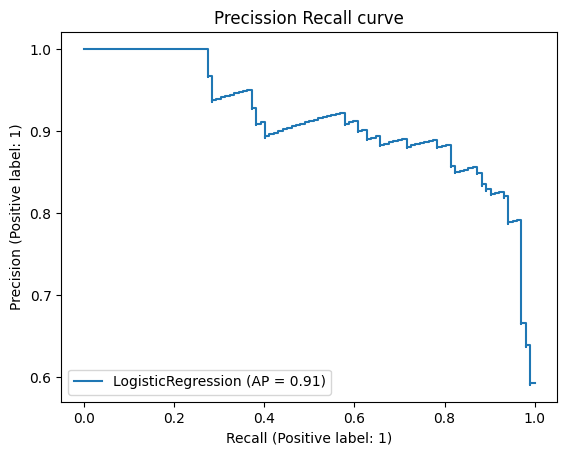

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Log loss = 0.38725
AUC = 0.90304
Average Precision = 0.91318

Using 0.5 as threshold:
Accuracy = 0.83696
Precision = 0.85294
Recall = 0.85294
F1 score = 0.85294

Classification Report
Confusion Matrix


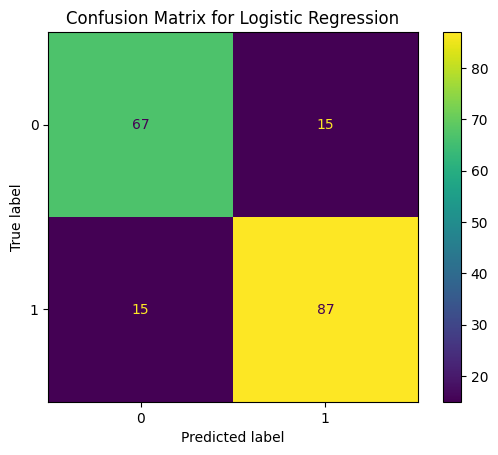

The performance for ridge logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



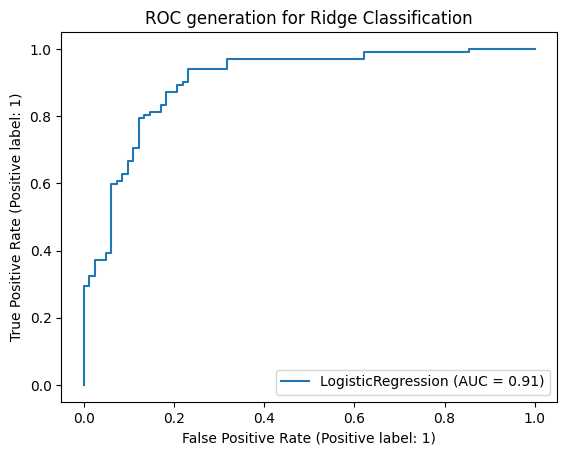

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



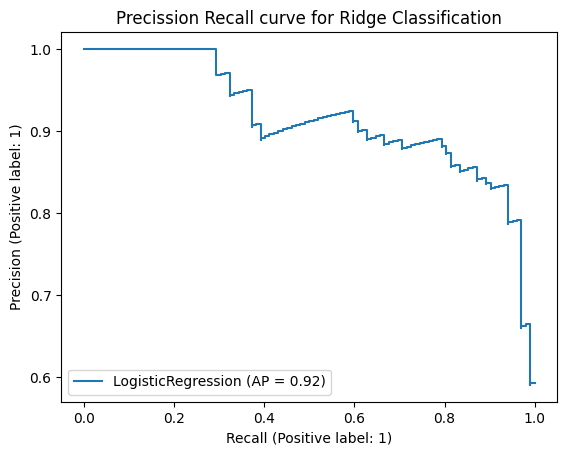

Log loss = 0.38494
AUC = 0.90519
Average Precision = 0.91555

Using 0.5 as threshold:
Accuracy = 0.83152
Precision = 0.85149
Recall = 0.84314
F1 score = 0.84729

Ridge Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



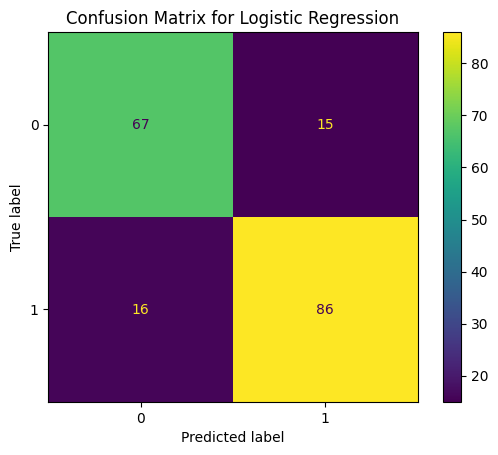

The performance for lasso logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



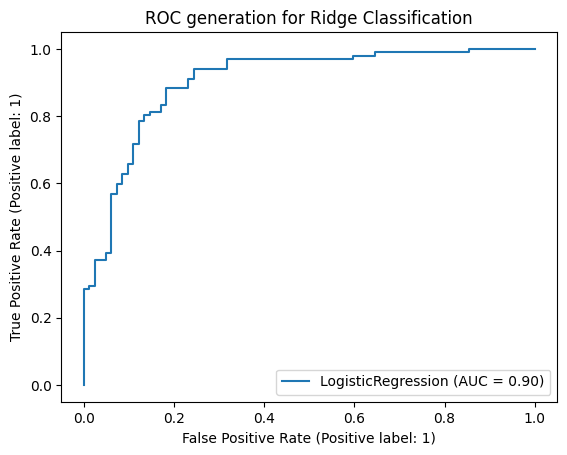

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



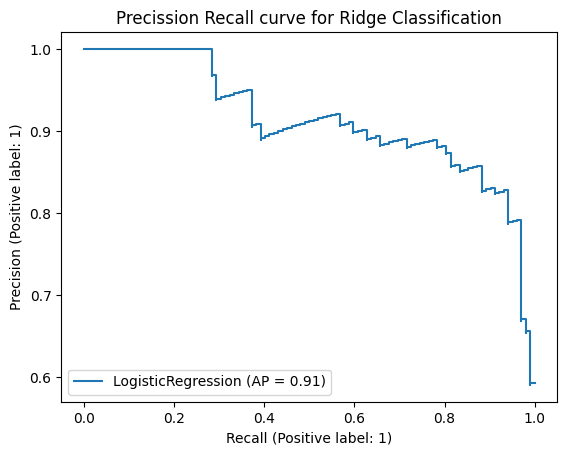

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Log loss = 0.38479
AUC = 0.90363
Average Precision = 0.91347

Using 0.5 as threshold:
Accuracy = 0.83152
Precision = 0.85149
Recall = 0.84314
F1 score = 0.84729

Ridge Classification Report
Confusion Matrix


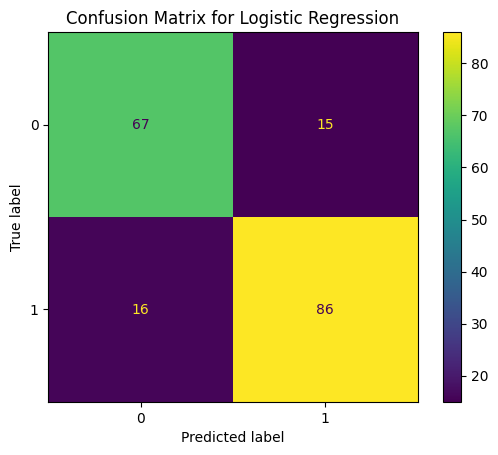

The performance for elasticn-et logistic


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



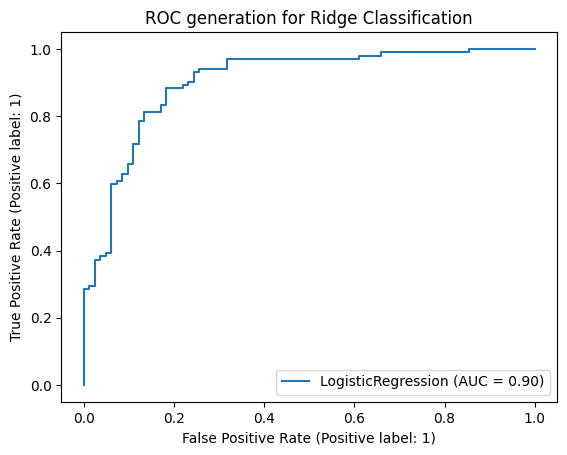

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



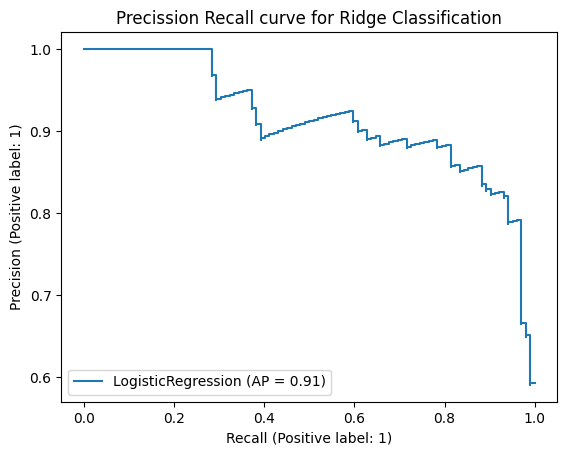

Log loss = 0.38605
AUC = 0.90399
Average Precision = 0.91416

Using 0.5 as threshold:
Accuracy = 0.83152
Precision = 0.85149
Recall = 0.84314
F1 score = 0.84729

Ridge Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



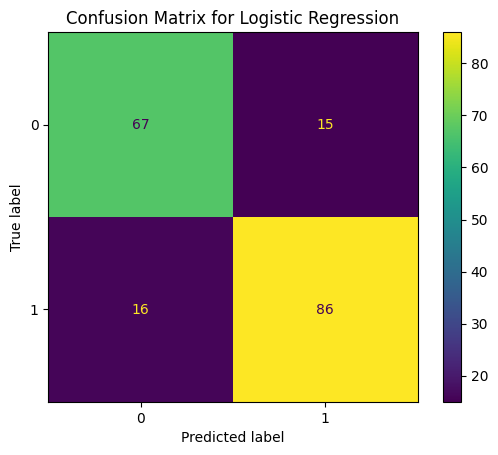

(184, 12)
(19,)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



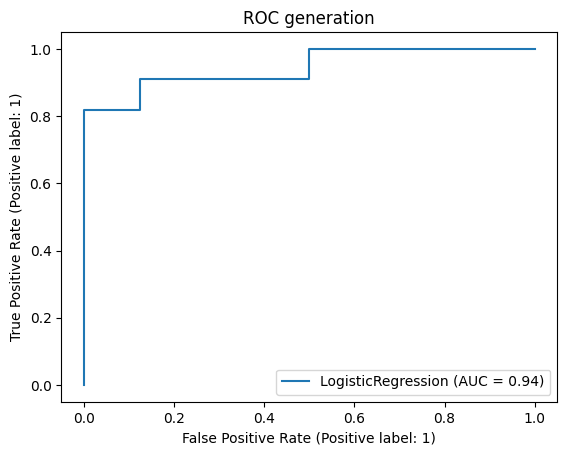

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



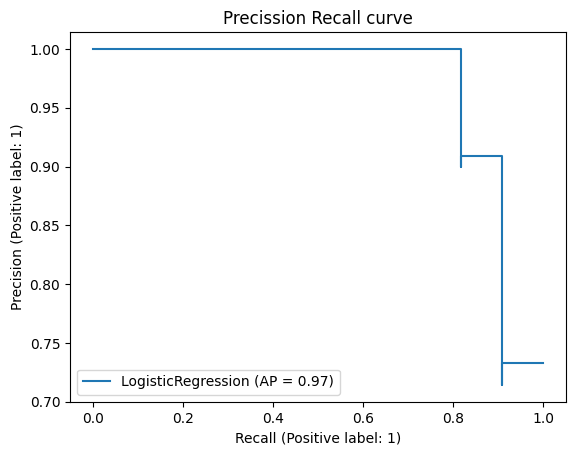

Logistic Regression Log loss = 0.30297
AUC = 0.94318
Average Precision = 0.96749

Using 0.5 as threshold:
Accuracy = 0.84211
Precision = 0.90000
Recall = 0.81818
F1 score = 0.85714

Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



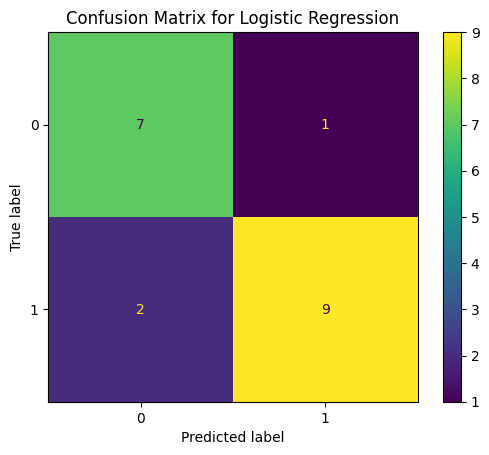

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



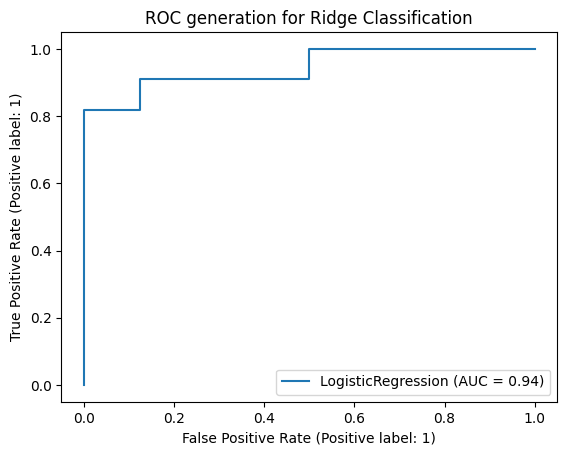

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



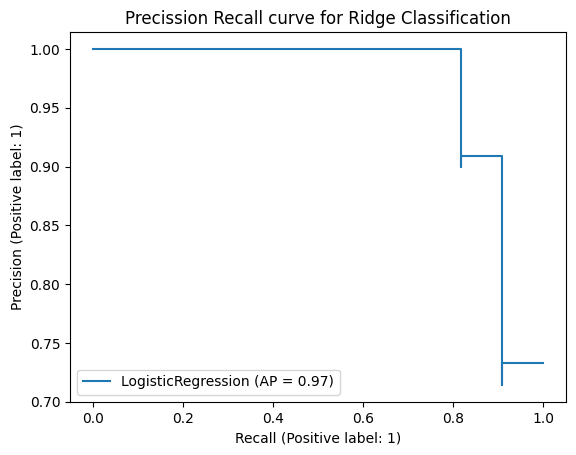

Ridge Logistic Regression Log loss = 0.30342
AUC = 0.94318
Average Precision = 0.96749

Using 0.5 as threshold:
Accuracy = 0.84211
Precision = 0.90000
Recall = 0.81818
F1 score = 0.85714

Ridge Classification Report
Confusion Matrix


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



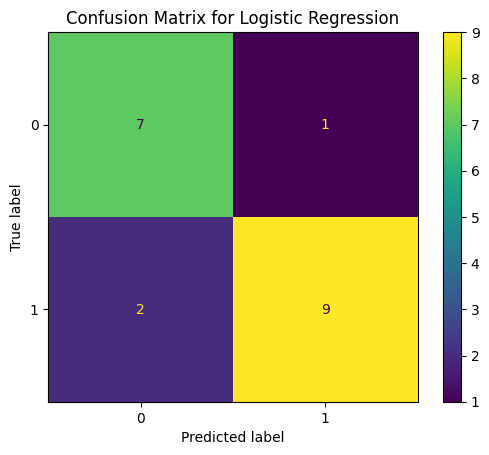

'\nRidge Logistic Regression Log loss = 0.46928\nAUC = 0.83333\nAverage Precision = 0.92118\n\nUsing 0.5 as threshold:\nAccuracy = 0.65000\nPrecision = 0.81818\nRecall = 0.64286\nF1 score = 0.72000\n'

In [55]:
#Data pre-processing 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
#For each features, except HeartDisease, checks for the outlier
DataFrame=pd.read_csv('heart.csv')
FeaturesConvert=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for feature in FeaturesConvert:
    Replace={}
    for num,value in enumerate(DataFrame[feature].unique()):
        Replace[value]=num
    DataFrame[feature]=DataFrame[feature].replace(Replace)
#for each feature, except HeartDisease, checks for outlier
for feature in DataFrame.columns[:-1]:
    mean=DataFrame[feature].mean()
    std=DataFrame[feature].std()
    #I have chosen to consider outliers all elements outside 6*std
    remove=(DataFrame[feature]<mean-6*std) | (DataFrame[feature]>mean+6*std)
    if (remove).any():
        print("Removed element(s) with:",feature,round(DataFrame[feature].loc[remove].values[0],2))
        DataFrame=DataFrame.loc[~remove]
        DataFrame.reset_index()
print("# of outliers removed:",918-DataFrame.shape[0])
print(np.shape(np.array(DataFrame)))
#let choose the rule for outlier as all elements that are outside 6*std
'''The RestingBP outlier detected from the plots was successfuly detected and removed!'''

#we now fix the wrong Cholesterol values.
labels=DataFrame["HeartDisease"]

filtered_data=DataFrame[DataFrame["Cholesterol"]>0]
#here we filter the dataset that in outlier and we try to use regression to predict those values 
X,y=filtered_data.drop(columns="Cholesterol"),filtered_data["Cholesterol"]
print('The X dataset are :',X.head())
print(np.shape(np.array(X)))

#linear regression
LinearR=LinearRegression().fit(X,y)
Y_pred=LinearR.predict(X)
LinearError=mean_squared_error(y,Y_pred,squared=False)
MeanError=mean_squared_error(y,[y.mean()]*len(y),squared=False)
MedianError=mean_squared_error(y, [y.median()]*len(y), squared=False)

#Ridge
RidgeR=linear_model.Ridge(alpha=0.1).fit(X,y)
Y_predRidge=RidgeR.predict(X)
RidgeError=mean_squared_error(y,Y_predRidge,squared=False)

#lasso
LassoR=linear_model.Lasso(alpha=0.1).fit(X,y)
Y_predLasso=LassoR.predict(X)
LassoError=mean_squared_error(y,Y_predLasso,squared=False)

'''
All regression methods perform slightly better than using median/mean as replacements.

Among all regression methods, Linear and Ridge achieved the lowest errors (however, the difference between all regression error is very small).

We will use the prediction of the Linear model.
'''

#we need to select only the data with wrong Cholesterol values and drop the Cholesterol column
y_pred=LinearR.predict(DataFrame[DataFrame["Cholesterol"]==0].drop(columns="Cholesterol"))

#Replace the value 
DataFrame.loc[DataFrame["Cholesterol"]==0,"Cholesterol"]=y_pred
print(np.shape(DataFrame))
print()
#so we have replace the cholesterol outliers by regression 

columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
cat_cols=list(set(DataFrame.columns)-set(columns)-{'HeartDisease'})#make sure no extra columns
cat_cols.sort()
print('The cat_cols is: ',cat_cols)
#splitting in train=80% and test=20%
random_seed=9
DataFrameTrain,DataFrameTest=train_test_split(DataFrame,test_size=0.2,random_state=random_seed,stratify=DataFrame['HeartDisease'])
#we use stratified Train-Test Splits Some classification problems do not have a balanced number of examples for each class label. As such
# , it is desirable to split the dataset
# into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
#setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that 
#both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.
#standardization of the data in order to ease calculations
print(DataFrameTrain.shape)
print(DataFrameTest.shape)
print()
print(DataFrameTrain['HeartDisease'].value_counts(normalize=True))
print()
print(DataFrameTest['HeartDisease'].value_counts(normalize=True))

#Scale the numerical variables 
scaler = StandardScaler()
scaler.fit(DataFrameTrain[columns])

def GetFeatureAndTargetArrays(DataFrame,numeric_cols,cat_cols,scaler):
    X_numeric_scaled=scaler.transform(DataFrame[numeric_cols])#scale the variable , only contain the variable in numeric cols
    X_categorical=DataFrame[cat_cols].to_numpy()#if there are duplicate coloumns
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = DataFrame['HeartDisease']
    return X, y

Xtrain, ytrain = GetFeatureAndTargetArrays(DataFrameTrain, columns, cat_cols, scaler)
#Benchmark
from sklearn.linear_model import LogisticRegression
#Logistic Regression building up 

print('Start to train the model .........')
print('The performance for logistic')

#Train the model 
Classification=LogisticRegression(penalty='none',fit_intercept=False)#without penalty term in the cost function 
Classification.fit(Xtrain,ytrain)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

Xtest,ytest=GetFeatureAndTargetArrays(DataFrameTest,columns,cat_cols,scaler)

plot_roc_curve(Classification,Xtest,ytest)
plt.title('ROC generation')
plt.show()
plot_precision_recall_curve(Classification,Xtest,ytest)
plt.title('Precission Recall curve')
plt.show()
TestProbability=Classification.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(Xtest)
#should returns 0,1
fpr1,tpr1,thresholds=roc_curve(ytest,TestProbability)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred)))

print('\nClassification Report')
print('Confusion Matrix')

plot_confusion_matrix(Classification, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
#Interpert the resultls 

coefficients=np.hstack((Classification.intercept_,Classification.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients})#create the dataframe 

#Regulaized Logistic Regression


#from glmnet import LogitNet
#0 for ridge and 1 for lasso 
#RidgeClassification=LogitNet(alpha=0)
#RidgeClassification.fit(Xtrain,ytrain)
#plot_roc_curve(RidgeClassification,Xtest,ytest)
#plt.title('ROC generation for Ridge Classification')
#plt.show()
#plot_precision_recall_curve(RidgeClassification,Xtest,ytest)
#plt.title('Precission Recall curve for Ridge Classification')
#plt.show()
print('The performance for ridge logistic')
RidgeC=LogisticRegression(penalty='l2',C=0.12, fit_intercept=False)
RidgeC.fit(Xtrain,ytrain)
plot_roc_curve(RidgeC,Xtest,ytest)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(RidgeC,Xtest,ytest)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability2=RidgeC.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=RidgeC.predict(Xtest)
#should returns 0,1
fpr2,tpr2,thresholds=roc_curve(ytest,TestProbability2)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred2)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
#Interpert the resultls 

coefficients=np.hstack((RidgeC.intercept_,RidgeC.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients})#create the dataframe 

'''
Ridge logistic regression:
Log loss = 0.38187
AUC = 0.90292
Average Precision = 0.91419

Using 0.5 as threshold:
Accuracy = 0.84783
Precision = 0.84259
Recall = 0.89216
F1 score = 0.86667
'''

'''
Logisitc Classification:

Log loss = 0.38245
AUC = 0.90292
Average Precision = 0.91392

Using 0.5 as threshold:
Accuracy = 0.84239
Precision = 0.83486
Recall = 0.89216
F1 score = 0.86256
'''


print('The performance for lasso logistic')
RidgeC=LogisticRegression(penalty='l1',C=0.7,solver='liblinear', fit_intercept=False)
RidgeC.fit(Xtrain,ytrain)
plot_roc_curve(RidgeC,Xtest,ytest)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(RidgeC,Xtest,ytest)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability2=RidgeC.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=RidgeC.predict(Xtest)
#should returns 0,1
fpr2,tpr2,thresholds=roc_curve(ytest,TestProbability2)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred2)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

print('The performance for elasticn-et logistic')
RidgeC=LogisticRegression(penalty='elasticnet',C=0.63, l1_ratio=0.2,solver='saga',fit_intercept=False)
RidgeC.fit(Xtrain,ytrain)
plot_roc_curve(RidgeC,Xtest,ytest)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(RidgeC,Xtest,ytest)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability2=RidgeC.predict_proba(Xtest)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=RidgeC.predict(Xtest)
#should returns 0,1
fpr2,tpr2,thresholds=roc_curve(ytest,TestProbability2)
print('Log loss = {:.5f}'.format(log_loss(ytest, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(ytest, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(ytest, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(ytest, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(ytest,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(ytest, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(ytest, TestPred2)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest, ytest)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
#WE can see the benchmark are slightly better but not perfect , let choose the penalty parameter by use K-fold cross vaidation/Leave-one-out Cross-valldated
# for ridge parameter minimizing the cross-validated error.

#Since the performance were not show a significant progress, we now draw 10% of the data and test and train with 0.8 and 0.2 in that 10% of data

DataFrameTrain,DataFrameTrain2=train_test_split(DataFrame,test_size=0.2,random_state=1,stratify=DataFrame['HeartDisease'])
print(np.shape(np.array(DataFrameTrain2)))
X,y=GetFeatureAndTargetArrays(DataFrameTrain2, columns, cat_cols, scaler)
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,y,test_size=0.1,random_state=1)
#DataTrains,DataTests=train_test_split(DataFrameTrain2,test_size=0.2,random_state=5,stratify=DataFrame['HeartDisease'])
print(np.shape(np.array(Ytest1)))
Classification.fit(Xtrain1,Ytrain1)

plot_roc_curve(Classification,Xtest1,Ytest1)
plt.title('ROC generation')
plt.show()
plot_precision_recall_curve(Classification,Xtest1,Ytest1)
plt.title('Precission Recall curve')
plt.show()
TestProbability2=Classification.predict_proba(Xtest1)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=Classification.predict(Xtest1)
#should returns 0,1

fpr1,tpr1,thresholds=roc_curve(Ytest1,TestProbability2)
print('Logistic Regression Log loss = {:.5f}'.format(log_loss(Ytest1, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(Ytest1, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(Ytest1, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(Ytest1, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(Ytest1,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(Ytest1, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(Ytest1, TestPred2)))

print('\nClassification Report')
print('Confusion Matrix')

plot_confusion_matrix(Classification, Xtest1, Ytest1)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
#Interpert the resultls 

coefficients2=np.hstack((Classification.intercept_,Classification.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients2})#create the dataframe 

#Ridge Logistic
RidgeC.fit(Xtrain1,Ytrain1)
plot_roc_curve(RidgeC,Xtest1,Ytest1)
plt.title('ROC generation for Ridge Classification')
plt.show()
plot_precision_recall_curve(RidgeC,Xtest1,Ytest1)
plt.title('Precission Recall curve for Ridge Classification')
plt.show()
TestProbability2=RidgeC.predict_proba(Xtest1)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred2=RidgeC.predict(Xtest1)
#should returns 0,1
fpr2,tpr2,thresholds=roc_curve(Ytest1,TestProbability2)
print('Ridge Logistic Regression Log loss = {:.5f}'.format(log_loss(Ytest1, TestProbability2)))
print('AUC = {:.5f}'.format(roc_auc_score(Ytest1, TestProbability2)))
print('Average Precision = {:.5f}'.format(average_precision_score(Ytest1, TestProbability2)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(Ytest1, TestPred2)))
print('Precision = {:.5f}'.format(precision_score(Ytest1,TestPred2)))
print('Recall = {:.5f}'.format(recall_score(Ytest1, TestPred2)))
print('F1 score = {:.5f}'.format(f1_score(Ytest1, TestPred2)))

print('\nRidge Classification Report')
print('Confusion Matrix')

plot_confusion_matrix(RidgeC, Xtest1, Ytest1)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
#Interpert the resultls 

coefficients=np.hstack((RidgeC.intercept_,RidgeC.coef_[0]))
import pandas as pd 
pd.DataFrame(data={'variable:':['intercept']+cat_cols+columns,'coefficients':coefficients})#create the dataframe 

'''
Logistic Regression Log loss = 0.58569
AUC = 0.83333
Average Precision = 0.92118

Using 0.5 as threshold:
Accuracy = 0.60000
Precision = 0.80000
Recall = 0.57143
F1 score = 0.66667
'''

'''
Ridge Logistic Regression Log loss = 0.46928
AUC = 0.83333
Average Precision = 0.92118

Using 0.5 as threshold:
Accuracy = 0.65000
Precision = 0.81818
Recall = 0.64286
F1 score = 0.72000
'''




### Aiming to use different size of data with aginst accuracy use 50% data to train

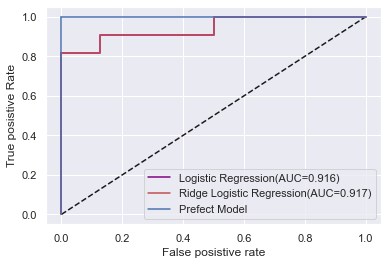

In [5]:
plt.plot(fpr1,tpr1,color='purple',label= "Logistic Regression(AUC=0.916)")
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2,tpr2,label='Ridge Logistic Regression(AUC=0.917)',color='r')
plt.plot([0,0],[0,1], '-',color='b')
plt.plot([0,1],[1,1], '-',color='b',label='Prefect Model')
plt.xlabel('False posistive rate')
plt.ylabel('True posistive Rate')
plt.legend()
plt.show()

In [6]:
print(fpr1)
print(fpr2)

[0.    0.    0.    0.125 0.125 0.5   0.5   1.   ]
[0.    0.    0.    0.125 0.125 0.5   0.5   1.   ]


In [7]:
#print(DataFrame)
#FeatureVariable=DataFrame.iloc[:,:-1]
#TargetVariable=DataFrame.iloc[:,11]
TestData=DataFrame.iloc[500:917,:-1]
TestY=DataFrame.iloc[500:917,11] #test data 417

In [56]:
logistic2=LogisticRegression(penalty='none',fit_intercept=False)
ridgec=LogisticRegression(penalty='l2',C=0.12,fit_intercept=False)
lassoC=LogisticRegression(penalty='l1',solver='liblinear',C=0.7,fit_intercept=False)
elasticC=LogisticRegression(penalty='elasticnet', C=0.63,solver='saga',l1_ratio=0.2,fit_intercept=False,max_iter=80000)

accuRidge=[]
accuLogistic=[]
acculassoC=[]
accuelasticC=[]
for i in range(2,250):
    alpha=i*2
    FeatureVariable=DataFrame.iloc[0:alpha,:-1]
    TargetVariable=DataFrame.iloc[0:alpha,11]
    logistic2.fit(FeatureVariable,TargetVariable )
    ridgec.fit(FeatureVariable,TargetVariable)
    lassoC.fit(FeatureVariable,TargetVariable)
    elasticC.fit(FeatureVariable,TargetVariable)
    pred1=ridgec.predict(TestData)
    pred2=logistic2.predict(TestData)
    pred3=lassoC.predict(TestData)
    pred4=elasticC.predict(TestData)
    accuRidge.append(accuracy_score(TestY, pred1))
    accuLogistic.append(accuracy_score(TestY,pred2))
    acculassoC.append(accuracy_score(TestY,pred3))
    accuelasticC.append(accuracy_score(TestY,pred4))



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

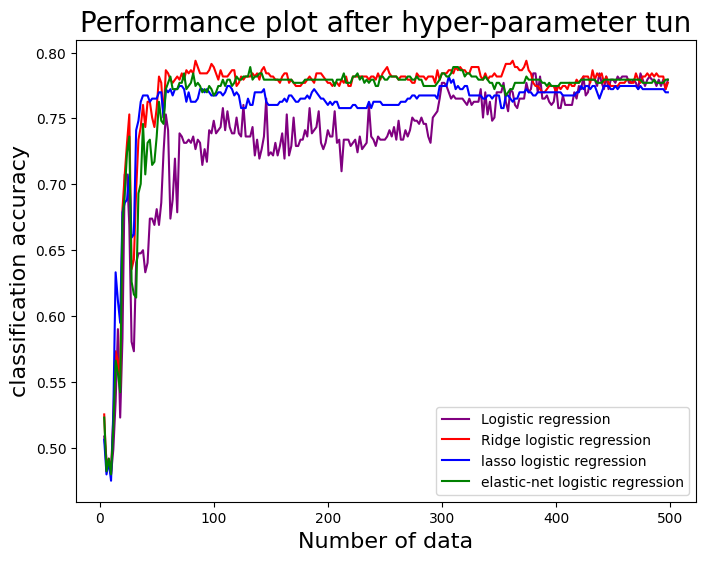

In [57]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
fig,ax=plt.subplots(figsize=(8,6))#figure and axes object(s) with size (10,10)
plt.plot([i*2 for i in range(2,250)], accuLogistic, color='purple',label='Logistic regression')
plt.plot([i*2 for i in range(2,250)], accuRidge, color='red',label='Ridge logistic regression')
plt.plot([i*2 for i in range(2,250)], acculassoC, color='blue',label='lasso logistic regression')
plt.plot([i*2 for i in range(2,250)], accuelasticC, color='green',label='elastic-net logistic regression')
plt.title(r'Performance plot after hyper-parameter tun',fontsize=20)
plt.xlabel('Number of data',fontsize=16)
plt.ylabel('classification accuracy',fontsize=16)
plt.legend()
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

In [49]:
print(max(accuRidge))

0.7937649880095923


In [38]:

print('The best parameters set for grid search is: {}'.format(randomsearch.best_params_))

The best parameters set for grid search is: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.125}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#use the whole dataset to do k-fold

ridgec=LogisticRegression(penalty='l2',fit_intercept=False)
lassoC=LogisticRegression(penalty='l1',solver='liblinear',fit_intercept=False)
elasticC=LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5,fit_intercept=False)


#penalty parameter choice 
method=['l1']
penalty=[0.001*i for i in range(1,1001)]
classifier=['liblinear']
l1_ratio=[i*0.01 for i in range(1,100)]
#create the grid
grid={'solver':classifier,'C':penalty, 'penalty':method}
#set up algorithm
gridsearch=GridSearchCV(estimator=lassoC,param_grid=grid,cv=8,verbose=2,n_jobs=10,scoring='accuracy',return_train_score=True)
randomsearch=RandomizedSearchCV(estimator=ridgec,param_distributions=grid,cv=8,verbose=2,n_jobs=10,n_iter=3000,scoring='accuracy',return_train_score=True)
#train 

result=randomsearch.fit(DataFrame.iloc[:,:-1],DataFrame.iloc[:,11])
'randomsearch.fit(train_standardized,ytrain)'
'result2=randomsearch.fit(new_data,new_y)'

print('The best parameters set for grid search is: {}'.format(randomsearch.best_params_))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 1000 is smaller than n_iter=3000. Running 1000 iterations. For exhaustive searches, use GridSearchCV.



Fitting 8 folds for each of 1000 candidates, totalling 8000 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.002, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.002, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.002, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.002, penalty=l1, 

### When the polynomial feature increases.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
data=poly.fit_transform(DataFrame.iloc[:,:-1])
print(DataFrame.iloc[:,:-1])
print(data.shape)
TestData=DataFrame.iloc[500:917,:-1]
TestY=DataFrame.iloc[500:917,11] #test data 417

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140        289.0          0           0   
1     49    1              1        160        180.0          0           0   
2     37    0              0        130        283.0          0           1   
3     48    1              2        138        214.0          0           0   
4     54    0              1        150        195.0          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110        264.0          0           0   
914   68    0              2        144        193.0          1           0   
915   57    0              2        130        131.0          0           0   
916   57    1              0        130        236.0          0           2   
917   38    0              1        138        175.0          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
logistic2=LogisticRegression(penalty='none')
ridgec=LogisticRegression(penalty='l2')
accuRidge=[]
accuLogistic=[]
for i in range(1,78):
    alpha=i
    FeatureVariable=data[0:500,:i]
    TargetVariable=DataFrame.iloc[0:500,11]
    TestData=data[500:917,:i]
    TestY=data[500:917,11] #test data 417
    logistic2.fit(FeatureVariable,TargetVariable )
    ridgec.fit(FeatureVariable,TargetVariable)
    pred1=ridgec.predict(TestData)
    pred2=logistic2.predict(TestData)
    accuRidge.append(accuracy_score(TestY, pred1))
    accuLogistic.append(accuracy_score(TestY,pred2))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

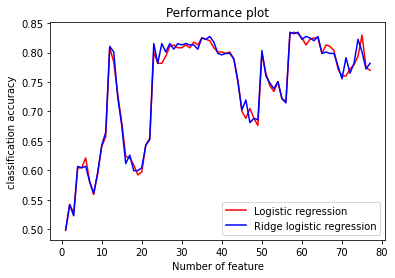

In [ ]:
plt.plot(range(1,78), accuLogistic, color='red',label='Logistic regression')
plt.plot(range(1,78), accuRidge, color='blue',label='Ridge logistic regression')
plt.title('Performance plot')
plt.xlabel('Number of feature')
plt.ylabel('classification accuracy')
plt.legend()
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

In [ ]:
X=DataFrame.iloc[0:800,:-1]
y=DataFrame.iloc[0:800,11]
xtest=DataFrame.iloc[800:917,:-1]
ytest=DataFrame.iloc[800:917,11]
#C value adjustment.
a=[]
c_value=[i for i in range(1,1001)]
for i in range(len(c_value)):
    ridgec=LogisticRegression(penalty='l2',C=c_value[i])
    ridgec.fit(X,y)
    pred=ridgec.predict(xtest)
    a.append(accuracy_score(ytest, pred))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

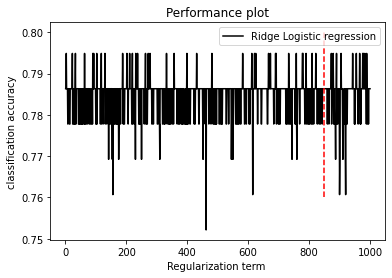

In [ ]:
plt.plot(range(1,1001), a, color='black',label='Ridge Logistic regression')
plt.title('Performance plot')
plt.xlabel('Regularization term ')
plt.ylabel('classification accuracy')
plt.legend()
plt.vlines(x=848,colors='red',ymin=0.76,ymax=0.8,linestyles='--')

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 

sigma=np.zeros((50,50))
for i in range(0,50):
    sigma[i,i]=(i+1)/10
mean=[0 for i in range(50)]
mean2=[0 for i in range(1000)]
sigma2=np.eye(1000,1000)
print(sigma2)
X=np.random.multivariate_normal(mean,sigma,(1,1000))
eps=np.random.multivariate_normal(mean2,sigma2)
beta=[1 for i in range(50)]
print(X[0].shape)
print(eps)
Y=np.matmul(X,beta)+eps

print(Y)


    


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(1000, 50)
[-1.30990482e+00 -8.20725774e-01 -2.22547442e+00  8.19785265e-01
  1.88996570e-02  6.92313727e-01 -2.24829792e-01  1.39248284e+00
 -1.54145869e+00  1.82167007e+00  6.68192173e-01  2.96671129e-01
 -6.61387206e-01  6.18318288e-01  5.09284449e-01  8.21931675e-01
 -1.95772680e+00  1.50086396e+00  1.60312517e-02 -2.26983382e-01
 -1.29799991e+00 -1.15398789e+00  6.42202827e-02  8.09889046e-01
  1.62605701e+00  3.90606729e-01 -7.29484118e-01  4.43252302e-01
 -1.40796835e+00  2.81010439e-01 -2.24186508e-01  9.03379213e-01
 -5.62526701e-01 -1.67415283e-02  3.26732114e-01  8.47746870e-01
 -1.17268188e+00 -3.34243868e-01 -1.15056999e+00 -8.68582929e-01
 -2.04476033e+00  1.40395733e-01 -5.75651345e-02 -1.12599743e+00
 -1.37346274e+00 -9.14682711e-01  2.18439624e-01 -9.49781239e-01
 -1.07579817e+00  9.07213577e-01 -1.49622054e+00 -8.9

In [ ]:
def ridge_estimate(sigma,ind,beta,lambda2):
    s=np.linalg.inv(sigma+np.multiply(ind,lambda2))
    k=np.matmul(sigma,beta)
    return s*k


ridge=[]
lambda2=[i*0.1 for i in range(1,1001)]
for i in range(len(lambda2)):
    ridge.append(ridge_estimate(sigma,mean,beta,lambda2[i]))

print(ridge)

[array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([[1., 0., 0., ..., 0., 0.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
n=1000
mean=np.array([0 for i in range(2)])
var=np.eye(2)
X=np.random.multivariate_normal(mean,var,1000)
beta=[1 for i in range(2)]
eps=np.random.multivariate_normal(mean,var,500)
eps2=np.reshape(eps,-1)

Y=np.dot(X,beta)+eps2


In [ ]:
def ridge_beta2(lamb,X2,Y2):
    a=np.linalg.inv(np.dot(np.transpose(X2),X2)+lamb*np.eye(2))
    b=np.dot(a,np.transpose(X2))
    c=np.dot(b,Y2)
    return c